In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def GROUND_HEIGHT_2D (x: np.ndarray):
    """
    Get ground height in meters
    :param x: position (in meters)
    :return: ground height (in meters)
    """
    return -100. * np.ones(shape=x.shape[0])

[6.38233599]
[20.94867794]
[36.63624684]
[54.49828781]
[76.17212457]
[104.59713328]
[145.93051898]
[216.03302679]
[372.86802316]
[1137.63059425]


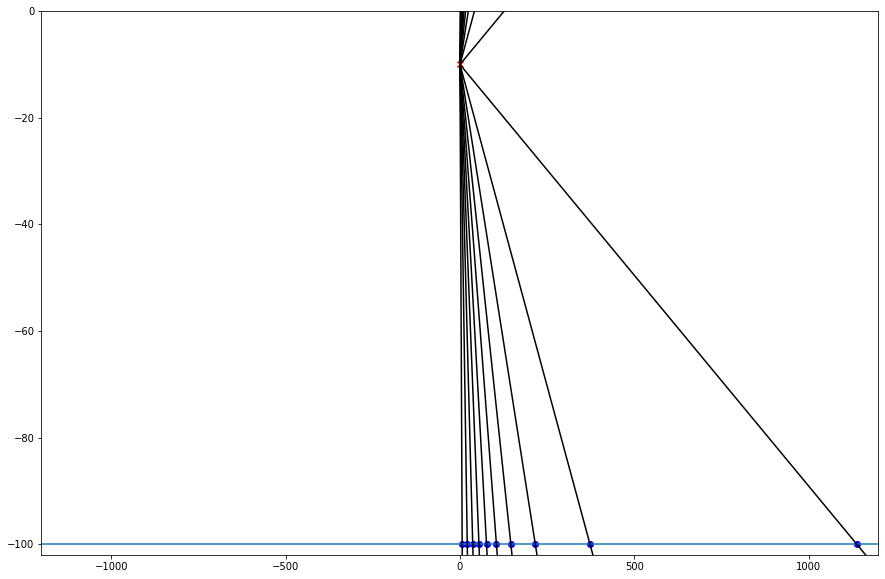

In [20]:
from scipy.optimize import fsolve
from math import pi as PI


plt.figure(figsize=(15, 10))
plt.xlim((-1200, 1200))
plt.ylim((-102, 0))


EMITTER_POS = (0, -10)  # in meters
plt.scatter(*EMITTER_POS, c='red', marker='x')


dist = np.linspace(-1200, 1200, 200)
plt.plot(dist, GROUND_HEIGHT_2D(dist))

angles = np.linspace (-1.5, 1.5, 20)
for angle in angles:
    

    def angle_func (x):
        a = np.tan(angle)
        return a * (x - EMITTER_POS[0]) + EMITTER_POS[1]  # a(x-xE) + yE

    samples = np.linspace(0, 2000, 100)
    plt.plot(samples, angle_func(samples), c='black')
    
    def diff_func (x):
        return np.power(angle_func(x) - GROUND_HEIGHT_2D(x), 2)
    
    x_intersect = fsolve(diff_func, x0=0)
    if x_intersect <= 0: continue
    

    print(x_intersect)
    plt.scatter(x_intersect, GROUND_HEIGHT_2D(x_intersect), c='blue')

plt.show()





